In [1]:
## Autoreloader if needed
#%load_ext autoreload
#%autoreload 2

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-consumer-behaviour-dataset/Amazon Customer Behavior Survey.csv


In [3]:
# additional tools used
import seaborn as sns

In [4]:
raw_data = pd.read_csv("/kaggle/input/amazon-consumer-behaviour-dataset/Amazon Customer Behavior Survey.csv")
original_data = raw_data.copy()
print("raw strurcture")
raw_data.head()


raw strurcture


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [5]:
print("more insights")
original_data.describe()

more insights


,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
print(original_data.info(),"\n")

print(original_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [7]:
lowest_age = raw_data.nsmallest(10,'age')
print(lowest_age['age'].head(3))
original_data[original_data["Product_Search_Method"].isna()]

442     3
578    12
237    15
Name: age, dtype: int64


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
119,2023/06/06 2:07:12 PM GMT+5:30,21,Female,Once a month,Clothing and Fashion,Sometimes,Few times a week,NaN,Multiple pages,3,...,Often,No,Moderately,Sometimes,3,Sometimes,3,3,User-friendly website/app interface,Customer service responsiveness
382,2023/06/08 5:49:59 PM GMT+5:30,47,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,No,Multiple times a day,NaN,Multiple pages,1,...,Often,No,Moderately,No,2,No,3,2,Wide product selection,Shipping speed and reliability


In [8]:
#raw_data.drop(442,inplace=True)
mode = raw_data['Product_Search_Method'].mode()[0]
raw_data.fillna(mode,inplace=True)
raw_data.drop_duplicates(inplace=True)
##raw_data.loc[[442]]

<Axes: >

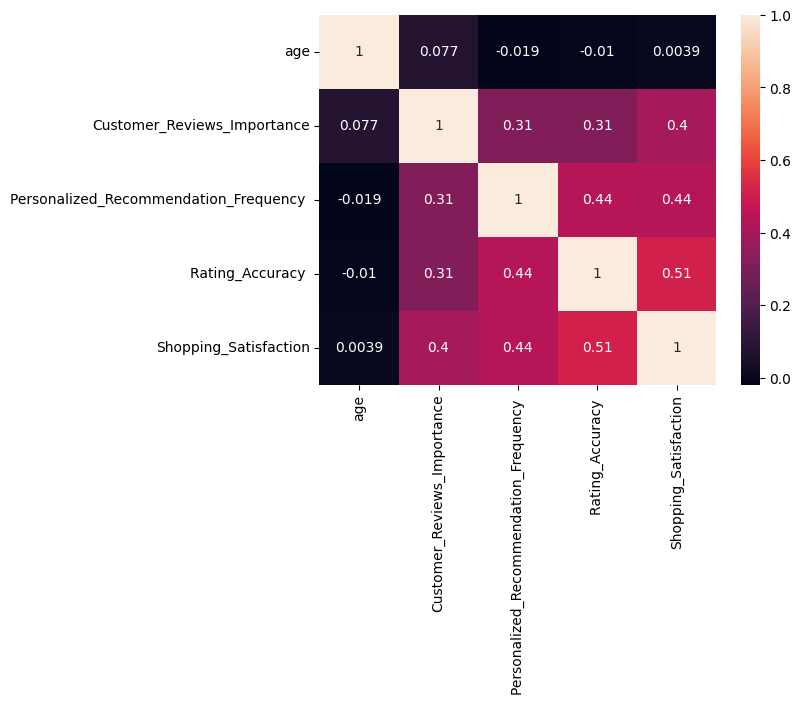

In [9]:
corr_matrix = raw_data.corr(method='pearson',numeric_only=True)
sns.heatmap(data=corr_matrix,annot=True)

## Analysis of Correaltion

**Biggest (realtivly strong) correlation** between Rating_Accuracy and Shopping_Statisfaction. The higher the rating accuracy the higher also the customer is *happy* with his shopping experience. In the context the **Rating_Accuracy** is the main key factor for all three correlations of satisfaction, frequency and importance.

**Smaller (realtivly weak) correlation:** 
The higher the Shopping Satisfaction (or vise versa affected by)
- Review Importance by 0.4
- Personalized Recomm. by 0.44
-  Rating Accuracy by 0.51